# To find cheapest winter hotels in US

In [1]:
!pip install requests
!pip install beautifulsoup4
!pip install pandas


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the URLs for different states.
# Here the information is accessed for 10 US states for checkin on 20/12/2024 and checkout on 21/12/2024 for 1 Adult.
state_urls = {
    "California": "https://www.booking.com/searchresults.html?ss=California%2C+United+States&checkin=2024-12-20&checkout=2024-12-21&group_adults=1&no_rooms=1&group_children=0",
    "Texas": "https://www.booking.com/searchresults.html?ss=Texas%2C+United+States&checkin=2024-12-20&checkout=2024-12-21&group_adults=1&no_rooms=1&group_children=0",
    "Florida": "https://www.booking.com/searchresults.html?ss=Florida%2C+United+States&checkin=2024-12-20&checkout=2024-12-21&group_adults=1&no_rooms=1&group_children=0",
    "New York": "https://www.booking.com/searchresults.html?ss=New+York%2C+United+States&checkin=2024-12-20&checkout=2024-12-21&group_adults=1&no_rooms=1&group_children=0",
    "Illinois": "https://www.booking.com/searchresults.html?ss=Illinois%2C+United+States&checkin=2024-12-20&checkout=2024-12-21&group_adults=1&no_rooms=1&group_children=0",
    "Pennsylvania": "https://www.booking.com/searchresults.html?ss=Pennsylvania%2C+United+States&checkin=2024-12-20&checkout=2024-12-21&group_adults=1&no_rooms=1&group_children=0",
    "Ohio": "https://www.booking.com/searchresults.html?ss=Ohio%2C+United+States&checkin=2024-12-20&checkout=2024-12-21&group_adults=1&no_rooms=1&group_children=0",
    "Georgia": "https://www.booking.com/searchresults.html?ss=Georgia%2C+United+States&checkin=2024-12-20&checkout=2024-12-21&group_adults=1&no_rooms=1&group_children=0",
    "North Carolina": "https://www.booking.com/searchresults.html?ss=North+Carolina%2C+United+States&checkin=2024-12-20&checkout=2024-12-21&group_adults=1&no_rooms=1&group_children=0",
    "Michigan": "https://www.booking.com/searchresults.html?ss=Michigan%2C+United+States&checkin=2024-12-20&checkout=2024-12-21&group_adults=1&no_rooms=1&group_children=0"
}

headers = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5042.108 Safari/537.36"
}

# Initialize the list for storing all results
all_results = []

# Loop through each state and URL
for state, url in state_urls.items():
    # Send the GET request
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Parse the HTML to extract hotel information
    for element in soup.find_all("div", {"data-testid": "property-card"}):
        name = element.find("div", {"data-testid": "title"}).text.strip()
        location = element.find("span", {"data-testid": "address"}).text.strip()
        pricing = element.find("span", {"data-testid": "price-and-discounted-price"}).text.strip()
        
        # Append the hotel data to the list
        all_results.append({
            "name": name,
            "location": location,
            "state": state,
            "pricing": pricing,
        })

# Create a pandas DataFrame from the list
df = pd.DataFrame(all_results)
df

,name,location,state,pricing
0,Urban Boutique Hotel,"Downtown San Diego, San Diego",California,£149
1,Best Western John Muir Inn,Martinez,California,£102
2,"Cabernet House, an Old World Inn",Napa,California,£249
3,Hyatt Place Sacramento Roseville,Roseville,California,£166
4,Ingleside Estate Hotel & Bungalows- Adults Only,Palm Springs,California,£311
...,...,...,...,...
253,"Holiday Inn Express Jackson, an IHG Hotel",Jackson,Michigan,£92
254,Extended Stay America Suites - Detroit - Canton,Canton,Michigan,£65
255,Days Inn and Suites by Wyndham Port Huron,Port Huron,Michigan,£80
256,Tru By Hilton Sterling Heights Detroit,Sterling Heights,Michigan,£83


In [3]:
# Clean the pricing data. 
df['pricing'] = df['pricing'].replace('[\£,]', '', regex=True).astype(float)

## Distribution of Hotel Prices by State

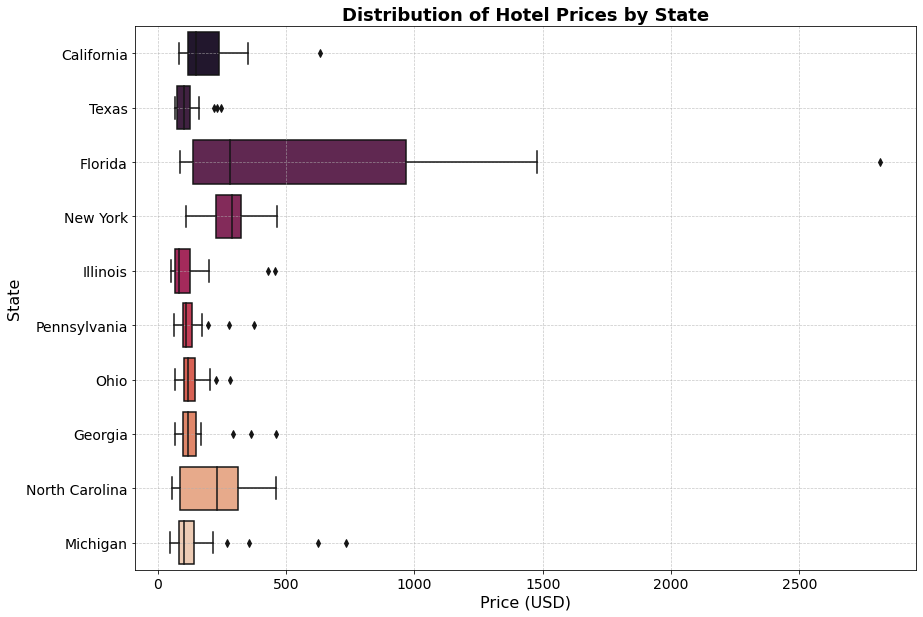

In [4]:
# Box Plot of Hotel Prices by State
plt.figure(figsize=(14, 10))

# Create the box plot
sns.boxplot(x='pricing', y='state', data=df, palette='rocket')

# Set the title and axis labels
plt.title('Distribution of Hotel Prices by State', fontsize=18, fontweight='bold')
plt.xlabel('Price (USD)', fontsize=16)
plt.ylabel('State', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()

## Calculating average hotel price per state to determine which state has cheapest rates

In [5]:


# Calculate the average hotel price per state
average_prices = df.groupby('state')['pricing'].mean().reset_index()

# Rename columns for clarity
average_prices.columns = ['state', 'average_price']

# Rank the states based on the average hotel price
average_prices = average_prices.sort_values(by='average_price').reset_index(drop=True)

# Display the ranked states
print(average_prices)

            state  average_price
0           Texas     112.384615
1        Illinois     121.615385
2            Ohio     129.346154
3    Pennsylvania     130.346154
4         Georgia     146.760000
5        Michigan     163.307692
6      California     191.807692
7  North Carolina     224.680000
8        New York     271.884615
9         Florida     613.807692


## Average hotel prices by state

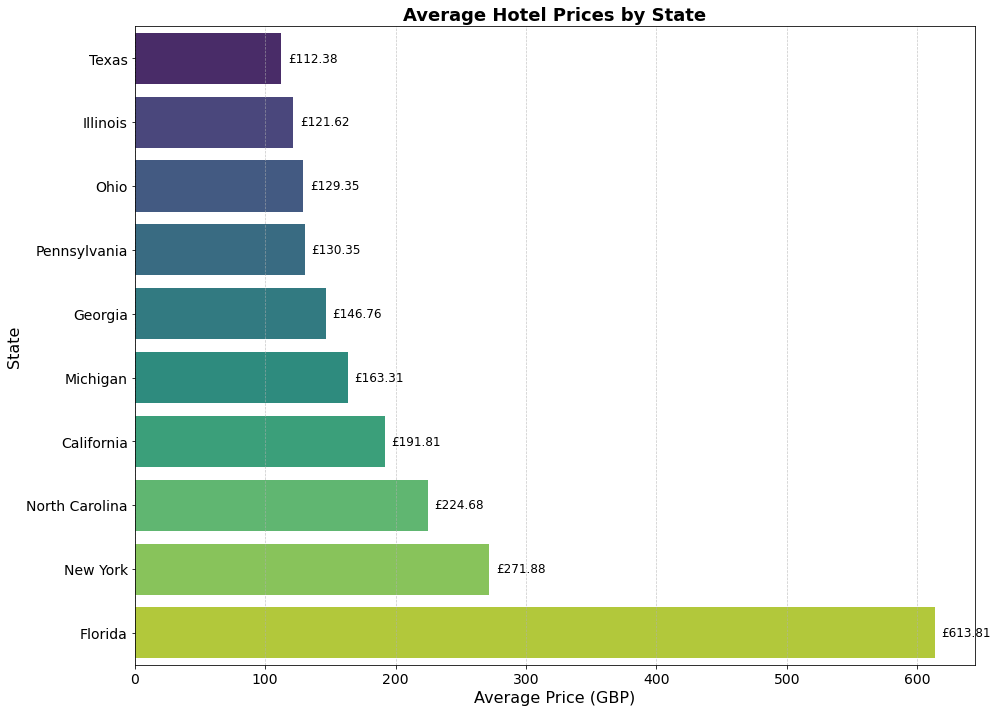

In [7]:
# Create the bar plot
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='average_price', y='state', data=average_prices, palette='viridis')

# Set the title and axis labels 
plt.title('Average Hotel Prices by State', fontsize=18, fontweight='bold')
plt.xlabel('Average Price (GBP)', fontsize=16)
plt.ylabel('State', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add value labels at the end of each bar
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height() / 2, f'£{width:,.2f}',
            ha='left', va='center', fontsize=12, color='black')

# Add gridlines for better readability
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7, which='both', axis='x')


plt.tight_layout()
plt.show()

# Conclusion

- Hotel prices vary significantly across different states in the UK, ranging from as low as 112.38 GBP in Texas to a steep 613.81 GBP in Florida. 

- More budget-friendly options are, Texas (112.38 GBP), Illinois (121.62 GBP), and Ohio (129.35 GBP). For moderately priced accommodations, Pennsylvania (130.35 GBP), Georgia (146.76 GBP), Michigan (163.31 GBP), or California (191.81 GBP) can be considered.

- On the pricier side, North Carolina (224.68 GBP) and New York (271.88 GBP) stand out, but nothing compares to Florida, where the average hotel price skyrockets to 613.81 GBP.

- Regionally, the South shows a wide range of prices with Florida being particularly expensive, whereas Texas is much more affordable. In the Northeast, New York's hotel prices are quite high, but Pennsylvania offers more reasonable rates.

------------------------------------------------------------------------------------------------------------------------------